#                                                  Online Retail

# Overview:

This project focuses on performing Customer Segmentation using unsupervised machine learning techniques, including both K-Means and DBSCAN clustering algorithms.
The main objective is to group customers into meaningful segments based on their behavioral and numerical features in order to uncover hidden patterns in customer data.

The project workflow includes:

Data preprocessing and handling missing values

Outlier detection and treatment using statistical methods

Feature scaling and transformation

Dimensionality reduction using PCA

Customer clustering using K-Means and DBSCAN

Comparative evaluation of clustering performance

This approach allows for both distance-based segmentation and density-based segmentation, providing a more comprehensive analysis of customer behavior.

# Feature Description:

The dataset consists of numerical and categorical features that describe customer characteristics and behavior.
Categorical features are encoded, and numerical features are scaled prior to clustering to ensure meaningful distance calculations.

## 1. Customer Identification

CustomerID: A unique identifier for each customer.
This feature is excluded from modeling as it does not contribute to the clustering process.

## 2. Behavioral & Numerical Features

These features capture customer behavior and are used as the primary inputs to the clustering algorithms:

Spending-related features: Reflect customer purchase amounts and monetary value.

Frequency-based features: Indicate how often customers interact or make transactions.

Time-based features: Represent recency or duration-related information.

Engineered features: Additional features created to enhance cluster separation and interpretability.

Outliers are handled using the Interquartile Range (IQR) method to reduce their impact on clustering performance.

## 3. Feature Scaling

Feature scaling is applied using StandardScaler or MinMaxScaler.

Scaling is essential because both K-Means and DBSCAN rely on distance measurements.

Proper scaling ensures that no single feature dominates the clustering process.

## 4. Dimensionality Reduction

Principal Component Analysis (PCA) is used to reduce the feature space.

PCA helps in:

Visualizing clusters in two-dimensional space

Reducing noise and redundancy

Improving clustering efficiency

## 5. Clustering Models
K-Means Clustering

Partitions customers into a predefined number of clusters.

The optimal number of clusters is determined using:

Elbow Method

Silhouette Score

Davies–Bouldin Index

DBSCAN Clustering

A density-based clustering algorithm that groups customers based on data density.

Capable of identifying:

Arbitrarily shaped clusters

Noise and outliers

Does not require specifying the number of clusters in advance.

Key parameters include:

eps: Neighborhood radius

min_samples: Minimum number of points required to form a dense region

# Output & Interpretation

Each customer is assigned a cluster label.

DBSCAN may label some customers as noise (-1).

Clusters are analyzed to understand:

High-value vs low-value customers

Core customers vs outliers

Behavioral similarities within segments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\crazy\OneDrive\Documents\Joox\online_retail_II.csv")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#data = data.head(5000000).copy()

In [5]:
data.shape

(1067371, 8)

In [6]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


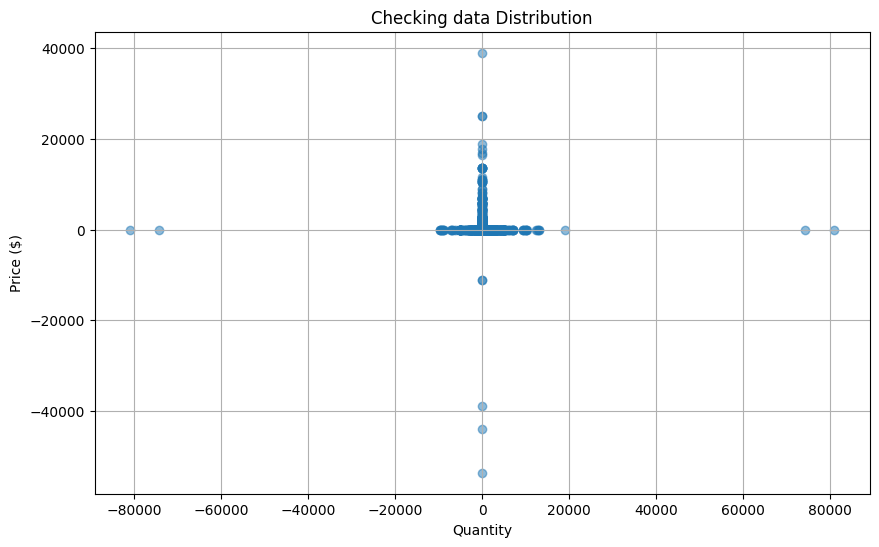

In [7]:
# Checking data Distribution
plt.figure(figsize=(10, 6))
plt.scatter(data['Quantity'], data['Price'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Price ($)')
plt.title('Checking data Distribution')
plt.grid(True)
plt.show()

In [8]:

# data = data.head(300000).copy()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [10]:
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


we got some problime in min    and max  alot of outlier s

In [11]:
data.shape

(1067371, 8)

In [12]:
data.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

#mode bec it's object data

In [13]:
data["Description"] = data["Description"].fillna(data["Description"].mode()[0])
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imp = IterativeImputer()
# data["Customer ID"] = imp.fit_transform(data[["Customer ID"]])

# olso we can drop  Cutomer id   it's not importnt

In [14]:
data = data.dropna(subset=['Customer ID'])

In [15]:
data.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [16]:
print("Sum of duplicated data = ", data.duplicated().sum())

Sum of duplicated data =  26479


In [17]:
data.drop_duplicates(inplace = True)

C:\Users\crazy\AppData\Local\Temp\ipykernel_30800\3807336157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace = True)


In [18]:
print("Sum of duplicated data = ", data.duplicated().sum())

Sum of duplicated data =  0


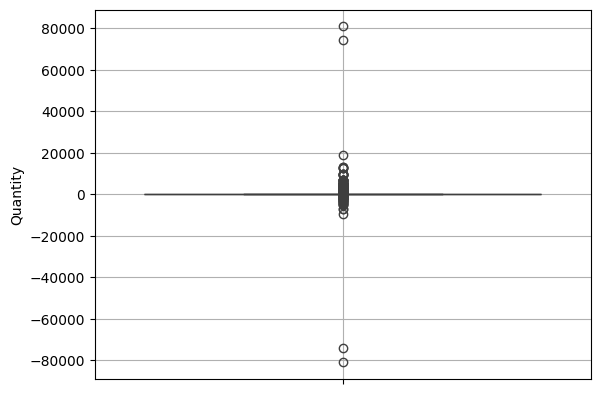

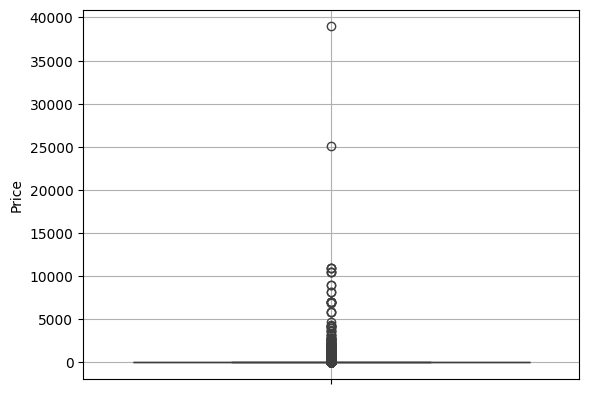

In [19]:
numeric_col = ["Quantity", "Price"]
for col in numeric_col:
    sns.boxplot(data[col])
    plt.grid(True)
    plt.show()

# # Using IQR Method to Handle Extreme Outliers

In [20]:
data = data[data['Quantity'] > 0]

data = data[data['Price'] > 0]

In [21]:
# col_with_outliers = ["Quantity", "Price"]
# for col in col_with_outliers:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - IQR * 1.5
#     upper = Q3 + IQR * 1.5
#     outliers = data[(data[col] < lower) | (data[col] > upper)]
#     data = data.drop(outliers.index)

In [22]:
Q1_qty = data['Quantity'].quantile(0.25)
Q3_qty = data['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

In [23]:
Q1_price = data['Price'].quantile(0.25)
Q3_price = data['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

In [24]:
# Filter data
data = data[
    (data['Quantity'] >= lower_bound_qty) &
    (data['Quantity'] <= upper_bound_qty) &
    (data['Price'] >= lower_bound_price) &
    (data['Price'] <= upper_bound_price)]

In [25]:
len(data)
data.shape

(663373, 8)

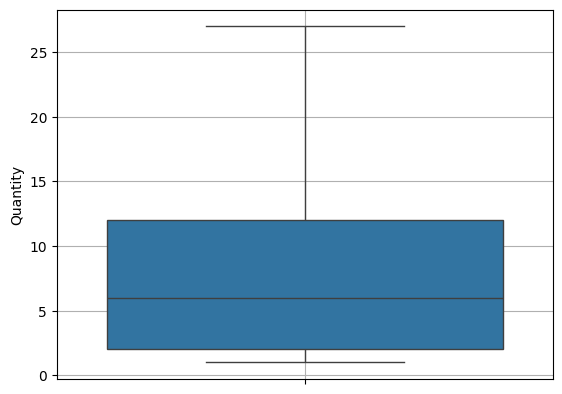

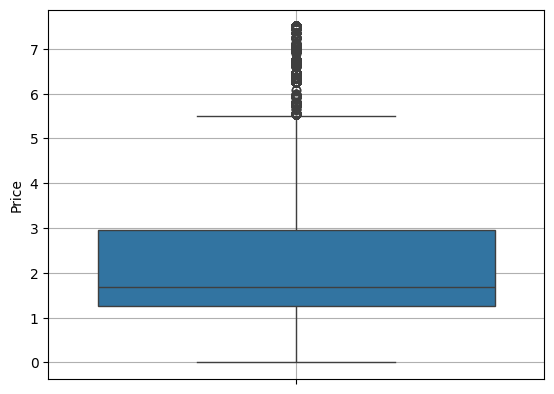

In [26]:
for col in numeric_col:
    sns.boxplot(data[col])
    plt.grid(True)
    plt.show()

In [27]:
data["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Poland', 'Channel Islands', 'Netherlands', 'Spain',
       'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'United Arab Emirates', 'Finland', 'Denmark', 'Italy',
       'Switzerland', 'Sweden', 'USA', 'Japan', 'Unspecified', 'Malta',
       'RSA', 'Singapore', 'Bahrain', 'Israel', 'Thailand', 'Lithuania',
       'Nigeria', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland',
       'Lebanon', 'Saudi Arabia', 'Czech Republic', 'European Community'],
      dtype=object)

![image.png](attachment:image.png)

# Feature Engineering
##
errors="coerce": لو في قيمة غلط → NaT (Not a Time)
مثال: "2009-12-01 07:45:00" → datetime object

In [28]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], errors = "coerce")
data["year_InvoiceDate"] = data["InvoiceDate"].dt.year
data["month_InvoiceDate"] = data["InvoiceDate"].dt.month
data["day_InvoiceDate"] = data["InvoiceDate"].dt.day
data["weekday_InvoiceDate"] = data["InvoiceDate"].dt.weekday
#
data.drop(["InvoiceDate"], axis = 1, inplace = True)

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
# United Kingdom
# France
# Germany
# United Kingdom
labelencoder = LabelEncoder()
data["Country"] = labelencoder.fit_transform(data["Country"])
#32  # United Kingdom
#9   # France
#11  # Germany
#32  # United Kingdom
#---------------------------------------------
# Feature Hashing (للـ Text Columns):
#### **ما هو Feature Hashing؟**
# ```
# Before:
# Description = "WHITE HANGING HEART T-LIGHT HOLDER"
# StockCode = "85048"
# Invoice = "489434"

# After:
# hash_feature_0 = 0.23
# hash_feature_1 = -0.15
# hash_feature_2 = 0.00
# ...
# hash_feature_49 = 0.18
hashing = FeatureHasher(n_features = 50, input_type = "string")
col_with_hashencoder = ["Description", "StockCode", "Invoice"]
for col in col_with_hashencoder:
    hashing_x = hashing.fit_transform(data[col].astype(str).values.reshape(-1, 1))
    hashing_df = pd.DataFrame(hashing_x.toarray(), columns=[f'hash_feature_{i}' for i in range(hashing.n_features)])
    data = pd.concat([data.reset_index(drop = True), hashing_df], axis = 1)
    data.drop([col], axis = 1, inplace = True)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
x_scaler = scaler.fit_transform(data)
# **MinMaxScaler Formula:**
# ```
# X_scaled = (X - X_min) / (X_max - X_min)
# ```

# **مثال:**
# ```
# Before:
# Quantity: [1, 50, 100, 19152]
# Price: [1.25, 2.1, 4.25, 25111.09]
# hash_feature_0: [-0.5, 0.2, 0.8, 1.2]

# After (0 to 1):
# Quantity: [0.00, 0.0026, 0.0052, 1.00]
# Price: [0.00, 0.000034, 0.00012, 1.00]
# hash_feature_0: [0.00, 0.41, 0.76, 1.00]

In [31]:
data.tail()

,Quantity,Price,Customer ID,Country,year_InvoiceDate,month_InvoiceDate,day_InvoiceDate,weekday_InvoiceDate,hash_feature_0,hash_feature_1,...,hash_feature_40,hash_feature_41,hash_feature_42,hash_feature_43,hash_feature_44,hash_feature_45,hash_feature_46,hash_feature_47,hash_feature_48,hash_feature_49
663368,12,0.85,12680.0,13,2011,12,9,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663369,6,2.10,12680.0,13,2011,12,9,4,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663370,4,4.15,12680.0,13,2011,12,9,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663371,4,4.15,12680.0,13,2011,12,9,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663372,3,4.95,12680.0,13,2011,12,9,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# how i can choose the right number of clusters ?
## using elbow Plot
# but we can got in overfiting  and under fiting
#### aqal 3addd men groups



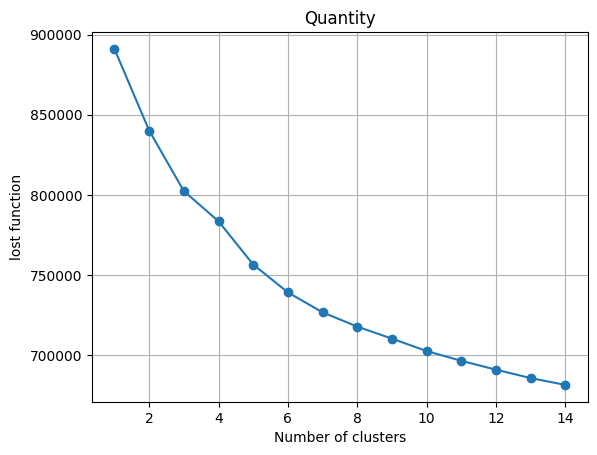

In [32]:
from sklearn.cluster import KMeans
i_list = []
n = 15
for i in range(1, n): #2 ,3,4,5,6,7,8,9  to 15
    kmean = KMeans(n_clusters = i, init = "k-means++")
    kmean.fit(x_scaler)
    i_list.append(kmean.inertia_)
plt.plot(range(1, n), i_list, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("lost function")
plt.title("Quantity")
plt.grid(True)
plt.show()

In [33]:
i_list

[891069.1290250276,
 840154.1447454813,
 802383.6596741752,
 783526.1117003594,
 756545.0210257793,
 739145.4709634234,
 726695.3617537984,
 717798.0140159705,
 710299.4980331701,
 702539.3168345181,
 696455.4878442511,
 690909.8880504185,
 685676.8791661987,
 681404.2298688592]

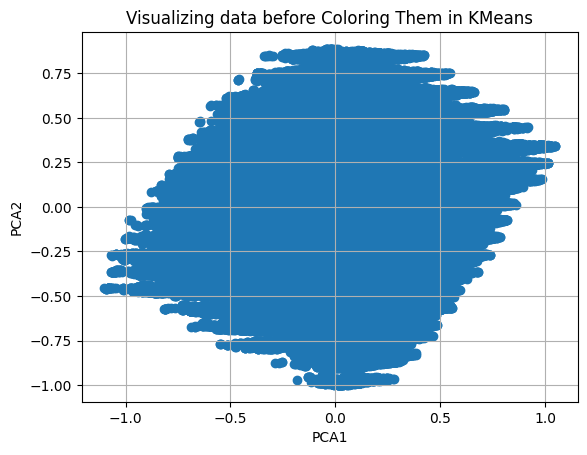

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaler)
plt.scatter(x = x_pca[:, 0], y = x_pca[:, 1])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Visualizing data before Coloring Them in KMeans")
plt.grid(True)
plt.show()

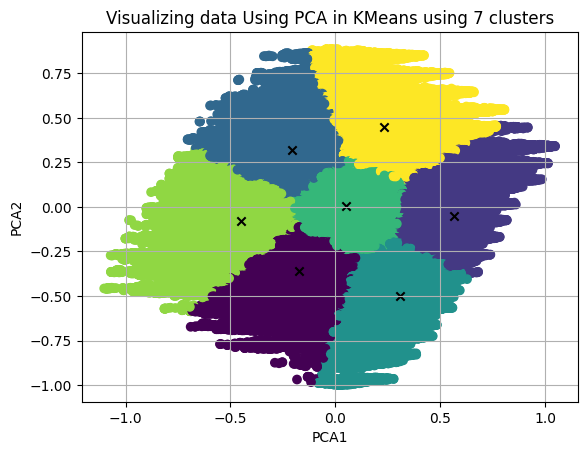

silhouette_score in KMean =  0.3523341560742063
davis bouldin score in KMeans =  0.8288863201172101


In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
n_clusters = 7 # the pest choise q
kmean = KMeans(n_clusters = n_clusters, init = "k-means++")
cluster_labels = kmean.fit_predict(x_pca)
plt.scatter(x = x_pca[:, 0], y = x_pca[:, 1], c = cluster_labels)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title(f"Visualizing data Using PCA in KMeans using {n_clusters} clusters")
plt.grid(True)
centroids = kmean.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c = "black", marker = 'x')
plt.show()
Silhouette_score = silhouette_score(x_pca, cluster_labels)
Davies_bouldin_score = davies_bouldin_score(x_pca, cluster_labels)
print("silhouette_score in KMean = ", Silhouette_score)
print("davis bouldin score in KMeans = ", Davies_bouldin_score)

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_pca)

plt.figure(figsize=(10, 6))
plt.scatter(x=x_pca[:, 0], y=x_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

n_clusters_dbscan, n_noise

MemoryError: 